# KNN

### iris dataset

iris.feature_names : 

Sepal Length : 꽃받침 길이  
Sepal Width  : 꽃받침 너비   
Petal Length  : 꽃잎 길이  
Petal Width   :  꽃잎 너비 

Species (꽃의 종류) :  setosa / versicolor / virginica 의 3종류로 구분된다.

**꽃받침 길이, 너비 두가지 feature 를 가지고 KNN 알고리즘을 이용하여 꽃의 종류 분류**

**neighbors.KNeighborsClassifier(n_neighbors, weights=weights)**

weights :  

‘uniform’ : uniform weights. 모든 neighbor 의 가중치를 동일하게 취급  
‘distance’ : neighbor 의 거리에 반비례하여 가중치 조정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [2]:
iris = datasets.load_iris()

# 꽃받침 길이, 너비 두가지 feature 선택
X = iris.data[:, :2]
y = iris.target

In [3]:
iris.data.shape

(150, 4)

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### KNN object 생성 및 train

In [6]:
clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

### 시각화

matplotlib.pyplot.pcolormesh(X, Y, C, cmap=)  
X: x coordinate  
Y: y coordinate  
C: color mapping 될 value

In [32]:
np.linspace(1, 100, 100)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [33]:
np.arange(0, 100, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

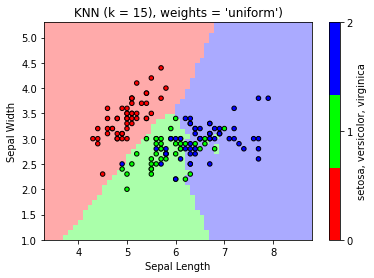

In [35]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1      # sepal(꽃받침) 길이의 최소, 최대값
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1      # sepal(꽃받침) 너비의 최소, 최대값

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))


Z = clf.predict(np.column_stack([xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])   #rgb(255, 170, 170), rgb(170, 255, 170), rgb(170, 170, 255)
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])    #rgb(255,0,0), rgb(0,255,0), rgb(0,0,255)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("KNN (k = 15), weights = 'uniform')")
plt.colorbar(ticks=range(3), format='%d', label='setosa, versicolor, virginica')

### 예측의 정확도 평가

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [11]:
y_predict = clf.predict(X_test)

In [12]:
accuracy_score(y_test, y_predict)

0.7333333333333333

# 실습

n_neighbors 를 변경하여 Test. Visualization 을 통하여 위 결과와 비교.

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')

# your code here

y_predict = clf.predict(X_test)
print("accuracy = {}".format(accuracy_score(y_test, y_predict)))